Homework 4: Sentiment Analysis - Task 2
----

Names & Sections
----
Names: Shashidhar Gollamudi - 6120
       Sunny Huang - 4120


Task 2: Train a Naive Bayes Model (30 points)
----

Using `nltk`'s `NaiveBayesClassifier` class, train a Naive Bayes classifier using a Bag of Words as features.
https://www.nltk.org/_modules/nltk/classify/naivebayes.html 

In [1]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils

# nltk for Naive Bayes and metrics
import nltk
import nltk.classify.util
from nltk.metrics.scores import (precision, recall, f_measure, accuracy)
from nltk.classify import NaiveBayesClassifier

# some potentially helpful data structures from collections
from collections import defaultdict, Counter

# so that we can make plots
import matplotlib.pyplot as plt
# if you want to use seaborn to make plots
#import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sunnyh2024/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# define constants for the files we are using
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

In [3]:
# load in your data and make sure you understand the format
# Do not print out too much so as to impede readability of your notebook
train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)


In [4]:
# set up a sentiment classifier using NLTK's NaiveBayesClassifier and 
# a bag of words as features
# take a look at the function in lecture notebook 7 (feel free to copy + paste that function)
# the nltk classifier expects a dictionary of features as input where the key is the feature name
# and the value is the feature value

# need to return a dict to work with the NLTK classifier
# Possible problem for students: evaluate the difference 
# between using binarized features and using counts (non binarized features)
x_train, y_train = train_tups
x_dev, y_dev = dev_tups

bag_of_words = sutils.create_index(x_train)

def word_feats(words, binarized=True) -> dict:   
    if binarized: 
        return dict([(word, True) for word in words])
    else:
        return Counter(words)

# set up & train a sentiment classifier using NLTK's NaiveBayesClassifier and
# classify the first example in the dev set as an example
# make sure your output is well-labeled
# Should take < 10 sec to train (on Felix's computer this takes 0.5 sec)
featureset = [(word_feats(x_train[i]), y_train[i]) for i in range(len(x_train))]
classifier = NaiveBayesClassifier.train(featureset)

# test to make sure that you can train the classifier and use it to classify a new example
dev_test = classifier.classify(word_feats(x_dev[0]))
print(f'Predicted: {dev_test}\nLabel: {y_dev[0]}')

dev_test2 = classifier.classify(word_feats(x_dev[1]))
print(f'Predicted: {dev_test2}\nLabel: {y_dev[1]}')


Predicted: 0
Label: 0
Predicted: 1
Label: 1


Precision: 0.8681318681318682
Recall: 0.7523809523809524
F1 Score: 0.8061224489795918
Accuracy: 0.81
F1 Score for binomial: 0.8061224489795918
F1 Score for multinomial: 0.8020833333333334
Metrics for Naive Bayes (binomial 1) when trained on 100% of data
Precision: 0.8681318681318682
Recall: 0.7523809523809524
F1 score: 0.8061224489795918
Accuracy: 0.81


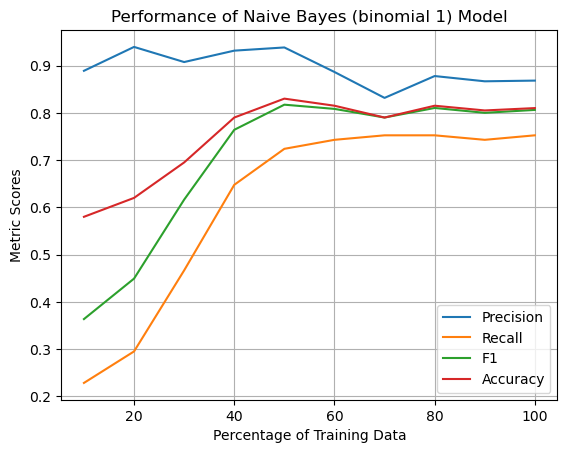

Metrics for Naive Bayes (binomial 2) when trained on 100% of data
Precision: 0.8681318681318682
Recall: 0.7523809523809524
F1 score: 0.8061224489795918
Accuracy: 0.81


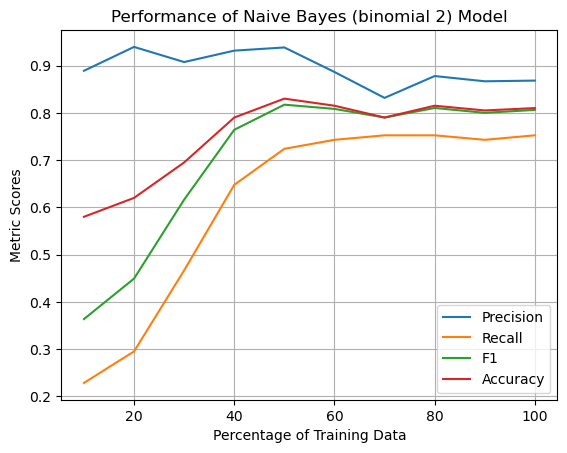

Metrics for Naive Bayes (binomial 3) when trained on 100% of data
Precision: 0.8681318681318682
Recall: 0.7523809523809524
F1 score: 0.8061224489795918
Accuracy: 0.81


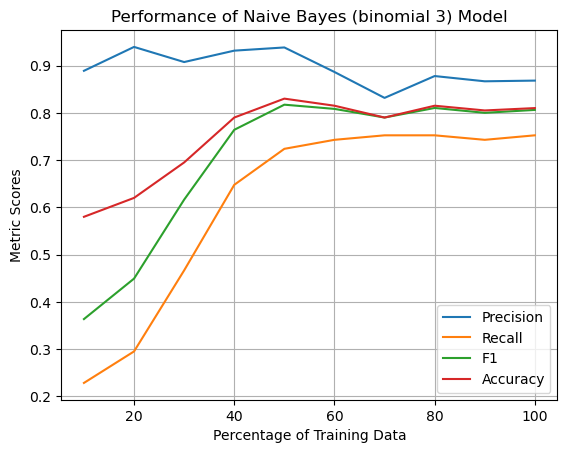

In [5]:
# Using the provided dev set, evaluate your model with precision, recall, and f1 score as well as accuracy
# You may use nltk's implemented `precision`, `recall`, `f_measure`, and `accuracy` functions
# (make sure to look at the documentation for these functions!)
# you will be creating a similar graph for logistic regression and neural nets, so make sure
# you use functions wisely so that you do not have excessive repeated code
# write any helper functions you need in sentiment_utils.py (functions that you'll use in your other notebooks as well
preds = []
for feat in x_dev:
    preds.append(classifier.classify(word_feats(feat)))

sutils.get_prfa(y_dev, preds, True)

def naive_metrics_fun(train_feats, dev_feats, percentage):
    classifier = NaiveBayesClassifier.train(train_feats[: int(len(train_feats) * percentage)])
    preds = []
    y_dev = []
    for feat, label in dev_feats:
        preds.append(classifier.classify(feat))
        y_dev.append(label)
    return y_dev, preds

# create a graph of your classifier's performance on the dev set as a function of the amount of training data
# the x-axis should be the amount of training data (as a percentage of the total training data)
# the y-axis should be the performance of the classifier on the dev set
# the graph should have 4 lines, one for each of precision, recall, f1, and accuracy
# the graph should have a legend, title, and axis labels
train_feats = [(word_feats(x_train[i]), y_train[i]) for i in range(len(x_train))]
dev_feats = [(word_feats(x_dev[i]), y_dev[i]) for i in range(len(x_dev))]

dev_y, preds = naive_metrics_fun(train_feats, dev_feats, 1)
_, _, f1, _ = sutils.get_prfa(dev_y, preds)
print(f'F1 Score for binomial: {f1}')

train_feats_multinomial = [(word_feats(x_train[i], False), y_train[i]) for i in range(len(x_train))]
dev_feats_multinomial = [(word_feats(x_dev[i], False), y_dev[i]) for i in range(len(x_dev))]

dev_y, preds = naive_metrics_fun(train_feats_multinomial, dev_feats_multinomial, 1)
_, _, f1, _ = sutils.get_prfa(dev_y, preds)
print(f'F1 Score for multinomial: {f1}')

for i in range(1, 4):
    sutils.create_training_graph(naive_metrics_fun, 
                                 train_feats, 
                                 dev_feats, 
                                 kind=f"Naive Bayes (binomial {i})", 
                                 savepath=f"figures/naive_bayes_{i}",
                                 verbose=True)
# takes approximately 3.5sec to run on Felix's computer


Test your model using both a __binarized__ and a __multinomial__ BoW. Use whichever one gives you a better final f1 score on the dev set to produce your graphs.

The f1 score for the binarized version was slightly better

- f1 score binarized: 0.8061224489795918
- f1 score multinomial: 0.8020833333333334